In [3]:
################# TO RECORD AUDIO FOR 2 SECs INTO output.wav FILE #########################
import pyaudio
import wave
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 2
filename = "./db/Radwa2.wav"
p = pyaudio.PyAudio()  # Create an interface to PortAudio
print('Recording')
stream = p.open(format=sample_format,channels=channels,rate=fs,frames_per_buffer=chunk,input=True)
frames = []  # Initialize array to store frames
# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()
print('Finished recording')
# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


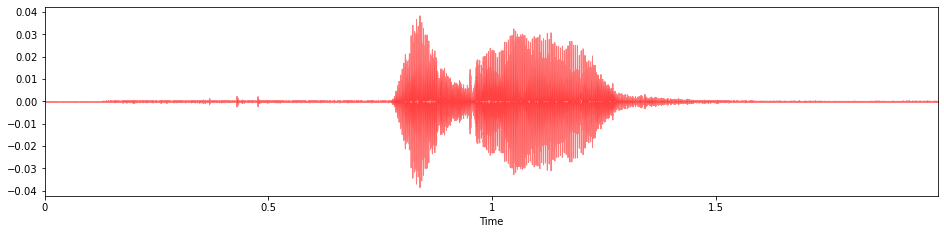

In [4]:
########### Play & Plot
from pydub import AudioSegment
from pydub.playback import play
import librosa
import librosa.display
from matplotlib import pyplot as plt

play(AudioSegment.from_wav(filename))
data1,sr1=librosa.load(filename)
plt.figure(figsize=(16,16))
plt.subplot(4, 1, 1)
librosa.display.waveplot(data1,sr1,color='r',alpha=0.5)
